<a href="https://colab.research.google.com/github/thedataninja1786/Data-Science/blob/main/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import linear_model

In [10]:
train_data = pd.read_csv('/content/drive/My Drive/House Prices - Advanced Regression Techniques/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/House Prices - Advanced Regression Techniques/test.csv')

sale_price = train_data['SalePrice'].reset_index(drop=True)
train_data = train_data.drop(['SalePrice'], axis=1)

#Concatenate the train and test data so the preprocessing is applied to both 
full_data = pd.concat([train_data,test_data]).reset_index(drop = True)

#full_data.info()

In [11]:
#Drop columns with more than 45% missing data 
cols_to_drop = []
for column in full_data:
  if full_data[column].isnull().sum() / len(full_data) >= 0.45:
    cols_to_drop.append(column)

full_data.drop(cols_to_drop, axis=1, inplace=True)

In [12]:
#One hot encode all the columns to numeric 

def calculation(df,column):
  column_contents = []
  for row in df[column]:
    if type(row) not in (int,float):
      column_contents.append(row)
  
  unique_contents = set(column_contents)
  ds = {}
  for i,j in enumerate(unique_contents):
    ds[j] = i 
  
  df[column] = df[column].replace(ds.keys(), list(map(str, ds.values()))).astype(float)

for column in full_data:
  calculation(full_data,column)

full_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,4.0,65.0,8450.0,1.0,2.0,3.0,0.0,0.0,0.0,4.0,3.0,3.0,4.0,7.0,7.0,5.0,2003.0,2003.0,3.0,0.0,10.0,11.0,1.0,196.0,0.0,0.0,3.0,0.0,1.0,0.0,5.0,706.0,4.0,0.0,150.0,856.0,3.0,2.0,1.0,0.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,0.0,8.0,0.0,0.0,3.0,2003.0,1.0,2.0,548.0,0.0,0.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,2.0,4.0
1,2.0,20.0,4.0,80.0,9600.0,1.0,2.0,3.0,0.0,2.0,0.0,1.0,7.0,3.0,4.0,5.0,6.0,8.0,1976.0,1976.0,3.0,0.0,9.0,9.0,0.0,0.0,1.0,0.0,5.0,0.0,1.0,2.0,3.0,978.0,4.0,0.0,284.0,1262.0,3.0,2.0,1.0,0.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,1.0,6.0,0.0,1.0,3.0,1976.0,1.0,2.0,460.0,0.0,0.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,2.0,4.0
2,3.0,60.0,4.0,68.0,11250.0,1.0,0.0,3.0,0.0,0.0,0.0,4.0,3.0,3.0,4.0,7.0,7.0,5.0,2001.0,2002.0,3.0,0.0,10.0,11.0,1.0,162.0,0.0,0.0,3.0,0.0,1.0,1.0,5.0,486.0,4.0,0.0,434.0,920.0,3.0,2.0,1.0,0.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,0.0,6.0,0.0,1.0,3.0,2001.0,1.0,2.0,608.0,0.0,0.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,2.0,4.0
3,4.0,70.0,4.0,60.0,9550.0,1.0,0.0,3.0,0.0,3.0,0.0,21.0,3.0,3.0,4.0,7.0,7.0,5.0,1915.0,1970.0,3.0,0.0,13.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,216.0,4.0,0.0,540.0,756.0,3.0,1.0,1.0,0.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,7.0,0.0,1.0,0.0,1998.0,0.0,3.0,642.0,0.0,0.0,2.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,2.0,1.0
4,5.0,60.0,4.0,84.0,14260.0,1.0,0.0,3.0,0.0,2.0,0.0,2.0,3.0,3.0,4.0,7.0,8.0,5.0,2000.0,2000.0,3.0,0.0,10.0,11.0,1.0,350.0,0.0,0.0,3.0,0.0,1.0,3.0,5.0,655.0,4.0,0.0,490.0,1145.0,3.0,2.0,1.0,0.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,0.0,9.0,0.0,1.0,3.0,2000.0,1.0,3.0,836.0,0.0,0.0,2.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,2.0,4.0


In [13]:
#Replace the missing values with the median 
columns = full_data.columns.values
for column in columns:
  if full_data[column].dtype == np.int64 or full_data[column].dtype == np.float64:
    full_data[column] = full_data[column].fillna(full_data[column].median())
full_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,4.0,65.0,8450.0,1.0,2.0,3.0,0.0,0.0,0.0,4.0,3.0,3.0,4.0,7.0,7.0,5.0,2003.0,2003.0,3.0,0.0,10.0,11.0,1.0,196.0,0.0,0.0,3.0,0.0,1.0,0.0,5.0,706.0,4.0,0.0,150.0,856.0,3.0,2.0,1.0,0.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,0.0,8.0,0.0,0.0,3.0,2003.0,1.0,2.0,548.0,0.0,0.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,2.0,4.0
1,2.0,20.0,4.0,80.0,9600.0,1.0,2.0,3.0,0.0,2.0,0.0,1.0,7.0,3.0,4.0,5.0,6.0,8.0,1976.0,1976.0,3.0,0.0,9.0,9.0,0.0,0.0,1.0,0.0,5.0,0.0,1.0,2.0,3.0,978.0,4.0,0.0,284.0,1262.0,3.0,2.0,1.0,0.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,1.0,6.0,0.0,1.0,3.0,1976.0,1.0,2.0,460.0,0.0,0.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,2.0,4.0
2,3.0,60.0,4.0,68.0,11250.0,1.0,0.0,3.0,0.0,0.0,0.0,4.0,3.0,3.0,4.0,7.0,7.0,5.0,2001.0,2002.0,3.0,0.0,10.0,11.0,1.0,162.0,0.0,0.0,3.0,0.0,1.0,1.0,5.0,486.0,4.0,0.0,434.0,920.0,3.0,2.0,1.0,0.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,0.0,6.0,0.0,1.0,3.0,2001.0,1.0,2.0,608.0,0.0,0.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,2.0,4.0
3,4.0,70.0,4.0,60.0,9550.0,1.0,0.0,3.0,0.0,3.0,0.0,21.0,3.0,3.0,4.0,7.0,7.0,5.0,1915.0,1970.0,3.0,0.0,13.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,216.0,4.0,0.0,540.0,756.0,3.0,1.0,1.0,0.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,7.0,0.0,1.0,0.0,1998.0,0.0,3.0,642.0,0.0,0.0,2.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,2.0,1.0
4,5.0,60.0,4.0,84.0,14260.0,1.0,0.0,3.0,0.0,2.0,0.0,2.0,3.0,3.0,4.0,7.0,8.0,5.0,2000.0,2000.0,3.0,0.0,10.0,11.0,1.0,350.0,0.0,0.0,3.0,0.0,1.0,3.0,5.0,655.0,4.0,0.0,490.0,1145.0,3.0,2.0,1.0,0.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,0.0,9.0,0.0,1.0,3.0,2000.0,1.0,3.0,836.0,0.0,0.0,2.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,2.0,4.0


In [14]:
#Drop the columns with less than 12% correlation to the dependent variable 
train_data = pd.read_csv('/content/drive/My Drive/House Prices - Advanced Regression Techniques/train.csv')
cols_to_drop = []
sale_price_corr = train_data.corr()['SalePrice'][:-1] #get the correlation of the dependent variable with the rest of the features


for column,row in sale_price_corr.iteritems():
  if abs(float(row)) < 0.12:
    cols_to_drop.append(column)

full_data.drop(cols_to_drop, axis=1, inplace=True)
full_data

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,SaleType,SaleCondition
0,4.0,65.0,8450.0,1.0,2.0,3.0,0.0,0.0,0.0,4.0,3.0,3.0,4.0,7.0,7.0,2003.0,2003.0,3.0,0.0,10.0,11.0,1.0,196.0,0.0,0.0,3.0,0.0,1.0,0.0,5.0,706.0,4.0,150.0,856.0,3.0,2.0,1.0,0.0,856.0,854.0,1710.0,1.0,2.0,1.0,3.0,1.0,0.0,8.0,0.0,0.0,3.0,2003.0,1.0,2.0,548.0,0.0,0.0,2.0,0.0,61.0,0.0,2.0,4.0
1,4.0,80.0,9600.0,1.0,2.0,3.0,0.0,2.0,0.0,1.0,7.0,3.0,4.0,5.0,6.0,1976.0,1976.0,3.0,0.0,9.0,9.0,0.0,0.0,1.0,0.0,5.0,0.0,1.0,2.0,3.0,978.0,4.0,284.0,1262.0,3.0,2.0,1.0,0.0,1262.0,0.0,1262.0,0.0,2.0,0.0,3.0,1.0,1.0,6.0,0.0,1.0,3.0,1976.0,1.0,2.0,460.0,0.0,0.0,2.0,298.0,0.0,0.0,2.0,4.0
2,4.0,68.0,11250.0,1.0,0.0,3.0,0.0,0.0,0.0,4.0,3.0,3.0,4.0,7.0,7.0,2001.0,2002.0,3.0,0.0,10.0,11.0,1.0,162.0,0.0,0.0,3.0,0.0,1.0,1.0,5.0,486.0,4.0,434.0,920.0,3.0,2.0,1.0,0.0,920.0,866.0,1786.0,1.0,2.0,1.0,3.0,1.0,0.0,6.0,0.0,1.0,3.0,2001.0,1.0,2.0,608.0,0.0,0.0,2.0,0.0,42.0,0.0,2.0,4.0
3,4.0,60.0,9550.0,1.0,0.0,3.0,0.0,3.0,0.0,21.0,3.0,3.0,4.0,7.0,7.0,1915.0,1970.0,3.0,0.0,13.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,216.0,4.0,540.0,756.0,3.0,1.0,1.0,0.0,961.0,756.0,1717.0,1.0,1.0,0.0,3.0,1.0,0.0,7.0,0.0,1.0,0.0,1998.0,0.0,3.0,642.0,0.0,0.0,2.0,0.0,35.0,272.0,2.0,1.0
4,4.0,84.0,14260.0,1.0,0.0,3.0,0.0,2.0,0.0,2.0,3.0,3.0,4.0,7.0,8.0,2000.0,2000.0,3.0,0.0,10.0,11.0,1.0,350.0,0.0,0.0,3.0,0.0,1.0,3.0,5.0,655.0,4.0,490.0,1145.0,3.0,2.0,1.0,0.0,1145.0,1053.0,2198.0,1.0,2.0,1.0,4.0,1.0,0.0,9.0,0.0,1.0,3.0,2000.0,1.0,3.0,836.0,0.0,0.0,2.0,192.0,84.0,0.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3.0,21.0,1936.0,1.0,2.0,3.0,0.0,0.0,0.0,13.0,3.0,3.0,0.0,7.0,4.0,1970.0,1970.0,3.0,0.0,8.0,4.0,0.0,0.0,1.0,0.0,5.0,1.0,1.0,0.0,4.0,0.0,4.0,546.0,546.0,3.0,1.0,1.0,0.0,546.0,546.0,1092.0,0.0,1.0,1.0,3.0,1.0,1.0,5.0,0.0,0.0,3.0,1979.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,4.0
2915,3.0,21.0,1894.0,1.0,2.0,3.0,0.0,0.0,0.0,13.0,3.0,3.0,2.0,7.0,4.0,1970.0,1970.0,3.0,0.0,8.0,4.0,0.0,0.0,1.0,0.0,5.0,1.0,1.0,0.0,1.0,252.0,4.0,294.0,546.0,3.0,0.0,1.0,0.0,546.0,546.0,1092.0,0.0,1.0,1.0,3.0,1.0,1.0,6.0,0.0,0.0,2.0,1970.0,0.0,1.0,286.0,0.0,0.0,2.0,0.0,24.0,0.0,2.0,1.0
2916,4.0,160.0,20000.0,1.0,2.0,3.0,0.0,0.0,0.0,16.0,3.0,3.0,4.0,5.0,5.0,1960.0,1996.0,3.0,0.0,10.0,11.0,0.0,0.0,1.0,0.0,5.0,1.0,1.0,0.0,3.0,1224.0,4.0,0.0,1224.0,3.0,2.0,1.0,0.0,1224.0,0.0,1224.0,1.0,1.0,0.0,4.0,1.0,1.0,7.0,0.0,1.0,0.0,1960.0,0.0,2.0,576.0,0.0,0.0,2.0,474.0,0.0,0.0,2.0,1.0
2917,4.0,62.0,10441.0,1.0,2.0,3.0,0.0,0.0,0.0,16.0,3.0,3.0,4.0,4.0,5.0,1992.0,1992.0,3.0,0.0,14.0,3.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,3.0,5.0,337.0,4.0,575.0,912.0,3.0,0.0,1.0,0.0,970.0,0.0,970.0,0.0,1.0,0.0,3.0,1.0,1.0,6.0,0.0,0.0,3.0,1979.0,1.0,0.0,0.0,0.0,0.0,2.0,80.0,32.0,0.0,2.0,4.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


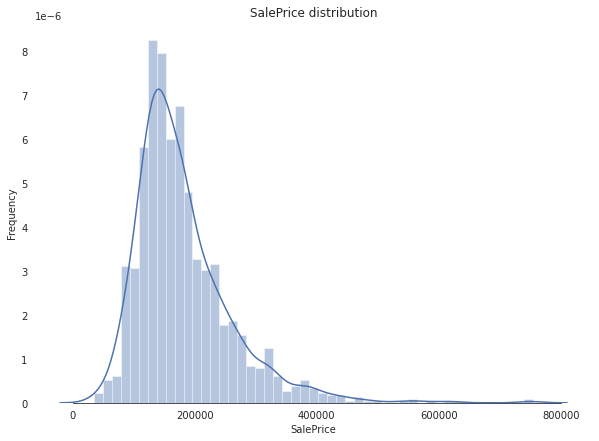

In [17]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(10, 7))
#Check the new distribution 
sns.distplot(sale_price, color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

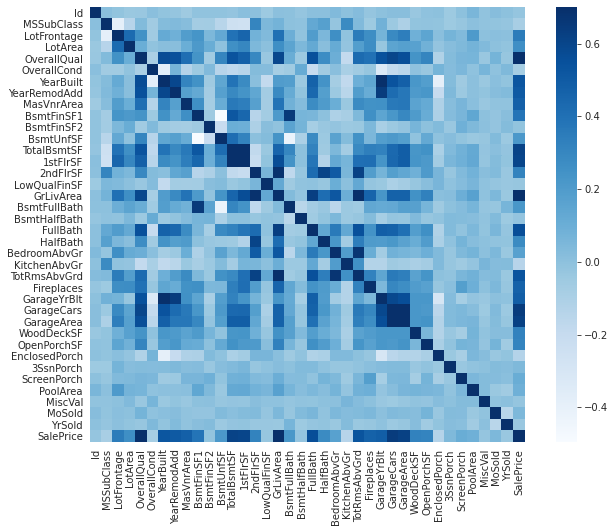

In [20]:
corr = train_data.corr()
plt.subplots(figsize=(11,8))
sns.heatmap(corr, vmax=0.7, cmap="Blues", square=True)

In [ ]:
#Transform the Sales Price dependent variable to logarithmic 
sale_price_log = np.log1p(sale_price)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


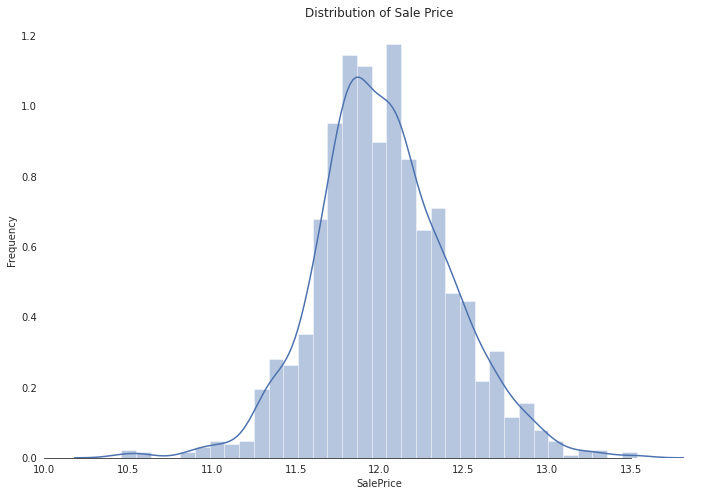

In [ ]:
#Plot the transformed sale price 
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(12, 8))
#Check the new distribution 
sns.distplot(sale_price_log, color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="Distribution of Sale Price")
sns.despine(trim=True, left=True)
plt.show()

In [ ]:
#Now that the data have been processes split again intro train and test 
train_df = full_data[:train_data.shape[0]]
test_df = full_data[train_data.shape[0]:]


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(train_df,sale_price_log)

In [ ]:
predictions = reg.predict(test_df)
predictions = np.exp(predictions) #remove the log-scale   
predictions

array([118747.19303622, 151625.68751745, 167418.79469279, ...,
       172537.62159474, 107166.86110165, 242193.45784817])

In [ ]:
#from xgboost import XGBRegressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)


xgb = xgboost.fit(train_df,sale_price)
xgb_predictions = xgb.predict(test_df)
xgb_predictions

array([124551.016, 164340.83 , 190301.17 , ..., 163743.61 , 115569.586,
       221667.22 ], dtype=float32)

In [ ]:
final = pd.DataFrame({'ID':test_data['Id'],'SalePrice':xgb_predictions})

final.to_csv('/content/drive/My Drive/House Prices - Advanced Regression Techniques/Predict_house_prices_xgb_log.csv', sep=',',index=False)